# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd 
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

## Cargar los datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
call = pd.read_csv('/datasets/megaline_calls.csv')

In [4]:
web = pd.read_csv('/datasets/megaline_internet.csv')

In [5]:
sms = pd.read_csv('/datasets/megaline_messages.csv')

In [6]:
plans = pd.read_csv('/datasets/megaline_plans.csv')

In [7]:
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Planes

In [8]:
# Imprime la información general/resumen sobre el DataFrame de los planes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Imprime una muestra de los datos para los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
# Revisaremos si nuestra primera tabla contiene valores ausentes.
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [11]:
# Revisaremos si nuestra primera tabla contiene valores duplicados
plans.duplicated().sum()

0

## Corregir los datos

-  En esta tabla no tenemos que corregir ningun datos ya que los nombres de columnas estan bien, no tenemos datos duplicados ni vlores ausentes.

## Enriquecer los datos

- Esta tabla no necesita enriquecer datos

## Usuarios

In [12]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Imprime una muestra de los datos para los usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [14]:
# Revisaremos si nuestra segunda tabla contiene valores ausentes.
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [15]:
# Revisaremos si nuestra segunda tabla contiene valores duplicados.
users.duplicated().sum()

0

- Tenemos las columnas reg_date y churn_date que estan identificadas como object siendo estas una fecha.
- la columna churn_date tiene la gran cantidad de sus valores ausentes y aunque creamos que se deben sustituir es mejor dejarlo asi ya que eso significa que los usuarios tienen vigente sus planes.

### Corregir datos

- Vamos a corregir la columna reg_date y churn_date de object a datetime

In [16]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

### Enriquecer datos

- Vamos a agregar a esta tabla la columna con solo el mes para poder tener mejores investigaciones en el futuro de este proyecto.

In [17]:
users['month_inicio'] = users['reg_date'].dt.month
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_inicio
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


In [18]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
# Imprime una muestra de datos para llamadas
call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [20]:
# Revisaremos si nuestra tercera tabla contiene valores ausentes.
call.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [21]:
# Revisaremos si nuestra tercera tabla contiene valores duplicados.
call.duplicated().sum()

0

- Tenemops el mismo caso la columna call_date que debe ser de tipo datetime esta en tipo object
- Esta tabla no contiene valores ausentes ni duplicados.

### Corregir datos

- Vamos a transformar la columna call_date de object a datetime.

In [22]:
call['call_date'] = pd.to_datetime(call['call_date'], format = '%Y-%m-%d')

### Enriquecer datos

- Agregaremos una columna extra con solo meses para futuras formulas.
- la duracion de la llamada tambien se modificara redondeandola hacia arriba, para asi poder tener un trabajo mas limpio.

In [23]:
call['duration'] = np.ceil(call['duration'])
call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [24]:
call['month'] = call['call_date'].dt.month
call.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


## Mensajes

In [25]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Imprime una muestra de datos para los mensajes
sms.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [27]:
# Revisaremos si nuestra cuarta tabla contiene valores ausentes.
sms.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [28]:
# Revisaremos si nuestra cuarta tabla contiene valores duplicados.
sms.duplicated().sum()

0

- continuamos con una columna de tipo object cuando deberia ser de tipo datetime.
- esta tabla no contiene valores ausentes ni duplicados.

### Corregir datos

- Vamos a transformar la columna message_date de object a un datetime.

In [29]:
sms['message_date'] = pd.to_datetime(sms['message_date'], format = '%Y-%m-%d')

### Enriquecer datos

- Agregaremos una columna extra de lo meses para futuros analisis.

In [30]:
sms['month'] = sms['message_date'].dt.month
sms.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [31]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
# Imprime una muestra de datos para el tráfico de internet
web.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [33]:
# Revisaremos si nuestra quinta tabla contiene valores ausentes.
web.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [34]:
# Revisaremos si nuestra quinta tabla contiene valores duplicados.
web.duplicated().sum()

0

- continuamos con una columna de tipo object cuando deberia ser de tipo datetime.
- esta tabla no contiene valores ausentes ni duplicados.

### Corregir datos

- Vamos a transformar la columna session_date de object a un datetime.

In [35]:
web['session_date'] = pd.to_datetime(web['session_date'], format = '%Y-%m-%d')

### Enriquecer datos

- Agregaremos una columna extra de lo meses para futuros analisis.

In [36]:
web['month'] = web['session_date'].dt.month
web.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones del plan

In [37]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- Tenemos un plan llamado surf que tiene un costo mensual de $20 el cual incluye en el mes:
1. 500 minutos
2. 50 sms
3. 15 gb 
- si se exceden del plan por:
1. 1 minuto: 3 centavos
2. 1 sms: 3 centavos
3. 1 gb: 10 dolares.

- y luego tenemos un segundo plan llamado ultimate que tiene un costo mensual de $70 dolares el cual incluye al mes:
1. 1000 minutos.
2. 3000 sms.
3. 30 gb 
- si se exceden del plan por:
1. 1 minuto: 1 centavo.
2. 1 sms: 1 centavo
3. 1 gb: 7 dolares

## Agregar datos por usuario

In [38]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
data_calls_group = call.pivot_table(index=['user_id', 'month'], values= 'duration', aggfunc = ['sum', 'count'])
data_calls_group.columns=['calls_total_min', 'calls_total']
data_calls_group.head()

calls_total_min  calls_total
user_id month                              
1000    12               124.0           16
1001    8                182.0           27
        9                315.0           49
        10               393.0           65
        11               426.0           64

In [39]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
data_sms_group = sms.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
data_sms_group.columns=['message_total']
data_sms_group.head()

message_total
user_id month               
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36

In [40]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
data_web_group = web.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc ='sum')
data_web_group.columns=['mb_used_total']
data_web_group.head()

mb_used_total
user_id month               
1000    12           1901.47
1001    8            6919.15
        9           13314.82
        10          22330.49
        11          18504.30

- este resultado se debe redondear hacia arriba para asi saber el consumo extra en gb que tiene cada usuario.

In [41]:
data_web_group['gb_used_total'] = np.ceil(data_web_group['mb_used_total']/1024)
data_web_group.drop('mb_used_total', axis=1, inplace=True)
data_web_group.head()

gb_used_total
user_id month               
1000    12               2.0
1001    8                7.0
        9               14.0
        10              22.0
        11              19.0

- Vamos a unir todas nuestras ttablas para asi poder tener un solo dateframe.

In [42]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
data_completa = pd.DataFrame(data_calls_group)
data_completa = data_calls_group.merge(data_sms_group, on=['user_id','month'], how='outer')\
            .merge(data_web_group, on=['user_id','month'], how='outer')
data_completa.reset_index(inplace=True)
data_completa.shape

(2293, 6)

In [43]:
data_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2293 non-null   int64  
 1   month            2293 non-null   int64  
 2   calls_total_min  2258 non-null   float64
 3   calls_total      2258 non-null   float64
 4   message_total    1806 non-null   float64
 5   gb_used_total    2277 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 107.6 KB


In [44]:
data_completa.isna().sum()

user_id              0
month                0
calls_total_min     35
calls_total         35
message_total      487
gb_used_total       16
dtype: int64

- Notamos que ahora nuestro nuevo dateframe tiene valores ausentes en 4 columnas, esto puede deberse que al unilar hay usuarios que no conmieron en el mes algunos de esos productos.
- Vamos a suplantas todos esos valores por 0 ya que todas las columnas con valores ausentes son de tipo float64

In [45]:
data_completa.fillna(0, inplace=True)
data_completa.isna().sum()

user_id            0
month              0
calls_total_min    0
calls_total        0
message_total      0
gb_used_total      0
dtype: int64

- Como ya tenemos un dateframe limpio vamos a unir nuestra tabla users con plans para eso cambiaremos el nombre de la columna de plan en users

In [46]:
# cambiando el nombre de la columna
users.rename({'plan': 'plan_name'}, axis=1, inplace=True)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month_inicio
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


In [47]:
# Añade la información del plan
users_plan = users.merge(plans, on='plan_name', how='left')
users_plan.head()

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,month_inicio,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,1000,30720,3000,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,50,15360,500,20,10,0.03,0.03
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,50,15360,500,20,10,0.03,0.03
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,50,15360,500,20,10,0.03,0.03
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,50,15360,500,20,10,0.03,0.03


In [48]:
# Ahora vamos a ñadir la informacion del consumo mensual.
data_consumo_total = data_completa.merge(users_plan, on='user_id', how='left')
print('el tamaño de nuestro dateframe es:', data_consumo_total.shape)
data_consumo_total.head(1)

el tamaño de nuestro dateframe es: (2293, 21)


,user_id,month,calls_total_min,calls_total,message_total,gb_used_total,first_name,last_name,age,city,...,plan_name,churn_date,month_inicio,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124.0,16.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,12,1000,30720,3000,70,7,0.01,0.01


- Vamos a crear una funcion para calcular los minutos extras por mes 

In [49]:
# Calcula el ingreso mensual para cada usuario
def consumo_extra_min(row):
    minutos=row['minutes_included']
    if row['calls_total_min'] <= minutos:
        return 0
    elif row['calls_total_min'] > minutos:
        return (row['calls_total_min'] - minutos) * row['usd_per_minute']
    else:
        float('NaN')

In [50]:
data_consumo_total['extra_min'] = data_consumo_total.apply(consumo_extra_min, axis=1)

- Ahora vamos a crear una funcion para calcular el consumo extra por sms


In [51]:
def consumo_extra_sms(row):
    messages=row['messages_included']
    if row['message_total'] <=  messages:
        return 0
    elif row['message_total'] > messages:
        return (row['message_total'] - messages) * row['usd_per_message']
    else:
        float('NaN')

In [52]:
data_consumo_total['extra_sms'] = data_consumo_total.apply(consumo_extra_sms, axis=1)

- Seguimos con una funcion para calcular el cargo extra por megabytes

In [53]:
def consumo_extra_mb(row):
    mb=row['mb_per_month_included']/1024
    if row['gb_used_total'] <=  mb:
        return 0
    elif row['gb_used_total'] > mb:
        return (row['gb_used_total'] - mb) * row['usd_per_gb']
    else:
        float('NaN')

In [54]:
data_consumo_total['extra_mb'] = data_consumo_total.apply(consumo_extra_mb, axis=1)

In [55]:
data_consumo_total['cargo_total'] = data_consumo_total['usd_monthly_pay']+data_consumo_total['extra_min']\
                                   +data_consumo_total['extra_sms']+data_consumo_total['extra_mb']


In [56]:
data_consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   calls_total_min        2293 non-null   float64       
 3   calls_total            2293 non-null   float64       
 4   message_total          2293 non-null   float64       
 5   gb_used_total          2293 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan_name              2293 non-null   object        
 12  churn_date             158 non-null    datetime64[ns]
 13  mon

## Estudia el comportamiento del usuario

### Llamadas

In [57]:
print('Estadísticas para el consumo realizado por los usuarios del plan Surf')
data_consumo_total.loc[data_consumo_total['plan_name']=='surf','calls_total_min':'gb_used_total'].describe()\
.style.format('{:.2f}')

Estadísticas para el consumo realizado por los usuarios del plan Surf


,calls_total_min,calls_total,message_total,gb_used_total
count,1573.00,1573.00,1573.00,1573.00
mean,428.75,59.81,31.16,16.67
std,234.45,32.02,33.57,7.85
min,0.00,0.00,0.00,0.00
25%,272.00,39.00,3.00,12.00
50%,425.00,60.00,24.00,17.00
75%,576.00,79.00,47.00,21.00
max,1510.00,205.00,266.00,70.00


In [58]:
print('Estadísticas para el consumo realizado por los usuarios del plan ultimate')
data_consumo_total.loc[data_consumo_total['plan_name']=='ultimate','calls_total_min':'gb_used_total'].describe()\
.style.format('{:.2f}')

Estadísticas para el consumo realizado por los usuarios del plan ultimate


,calls_total_min,calls_total,message_total,gb_used_total
count,720.00,720.00,720.00,720.00
mean,430.45,60.63,37.55,17.31
std,240.51,33.24,34.77,7.67
min,0.00,0.00,0.00,0.00
25%,260.00,36.00,7.00,13.00
50%,424.00,61.00,30.00,17.00
75%,565.25,80.00,61.00,21.00
max,1369.00,191.00,166.00,46.00


In [59]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
data_grouped = data_consumo_total.pivot_table(index=['month', 'plan_name'], values='calls_total_min', aggfunc='mean')
data_grouped.columns=['minutos_medios']
data_grouped.reset_index(inplace=True)
data_grouped.head()


,month,plan_name,minutos_medios
0,1,surf,203.000000
1,1,ultimate,193.500000
2,2,surf,297.000000
3,2,ultimate,403.142857
4,3,surf,330.000000


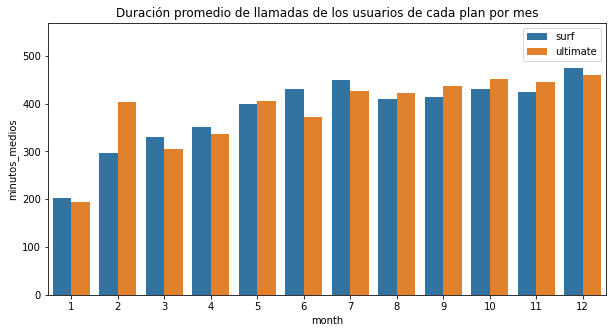

In [60]:
plt.subplots(figsize=(10,5))
sns.barplot(data=data_grouped, x='month', y='minutos_medios', hue='plan_name')
plt.ylim(0, data_grouped['minutos_medios'].max()*1.2)
plt.title('Duración promedio de llamadas de los usuarios de cada plan por mes')
plt.legend(loc='best')
plt.show()

In [61]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
data_grouped_1 = data_consumo_total.pivot_table(index=['month', 'plan_name'], values='calls_total_min', aggfunc='sum')
data_grouped_1.reset_index(inplace=True)
data_grouped_1.head()


,month,plan_name,calls_total_min
0,1,surf,406.0
1,1,ultimate,774.0
2,2,surf,2673.0
3,2,ultimate,2822.0
4,3,surf,7590.0


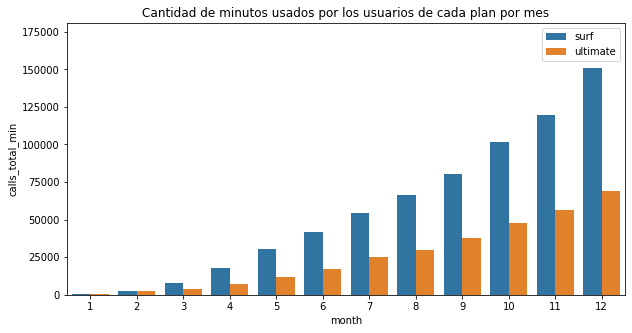

In [62]:
plt.subplots(figsize=(10,5))
sns.barplot(data=data_grouped_1, x='month', y='calls_total_min', hue='plan_name')
plt.ylim(0, data_grouped_1['calls_total_min'].max()*1.2)
plt.title('Cantidad de minutos usados por los usuarios de cada plan por mes')
plt.legend(loc='best')
plt.show()

In [63]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_calls = data_consumo_total.pivot_table(index='plan_name', values= 'calls_total_min',\
                                       aggfunc=['mean', 'var'])\
                                        .style.format('{:.2f}')
media_calls

,mean,var
,calls_total_min,calls_total_min
plan_name,,
surf,428.75,54968.28
ultimate,430.45,57844.46


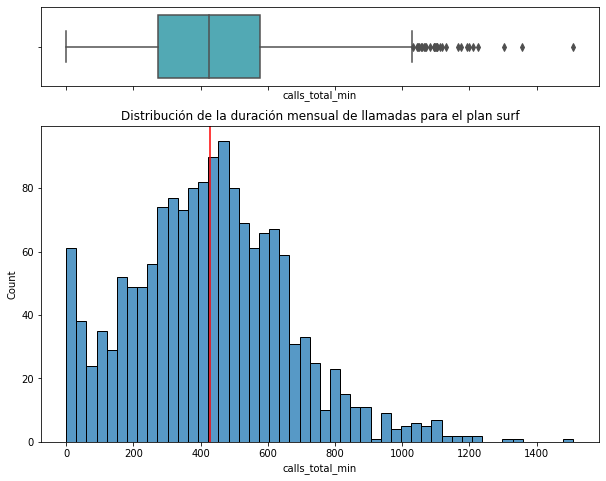

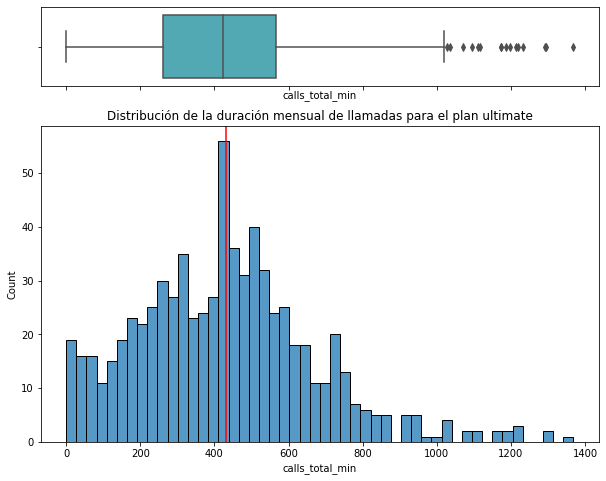

In [64]:
for var in ['surf','ultimate']:
    f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)},figsize=(10,8))
    datos=data_consumo_total.query('plan_name == @var')
    # gráfico boxplot
    sns.boxplot(x=datos['calls_total_min'],data=datos,ax=ax[0],palette='YlGnBu_r')
    # gráfico de distribución
    sns.histplot(datos['calls_total_min'],bins=50,ax=ax[1])
    # media de los datos en el histograma
    ax[1].axvline(datos['calls_total_min'].mean(), color='red')
    plt.title('Distribución de la duración mensual de llamadas para el plan '+var)
    plt.show()

### Mensajes

In [65]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
data_group_sms = data_consumo_total.pivot_table(index=['month', 'plan_name'], values='message_total', aggfunc='sum')
data_group_sms.columns=['mensajes_totales']
data_group_sms.reset_index(inplace=True)
data_group_sms.head()

,month,plan_name,mensajes_totales
0,1,surf,21.0
1,1,ultimate,62.0
2,2,surf,108.0
3,2,ultimate,151.0
4,3,surf,351.0


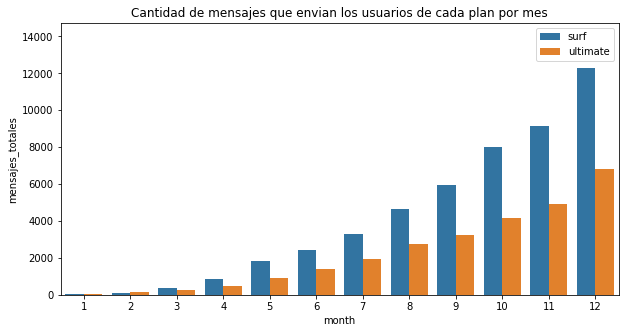

In [69]:
plt.subplots(figsize=(10,5))
sns.barplot(data=data_group_sms, x='month', y='mensajes_totales', hue='plan_name')
plt.ylim(0, data_group_sms['mensajes_totales'].max()*1.2)
plt.title('Cantidad de mensajes que envian los usuarios de cada plan por mes')
plt.legend(loc='best')
plt.show()

In [67]:
# calculemos la varianza y la media de los msm 
media_sms = data_consumo_total.pivot_table(index='plan_name', values= 'message_total',\
                                       aggfunc=['mean', 'var'])\
                                        .style.format('{:.2f}')
media_sms

,mean,var
,message_total,message_total
plan_name,,
surf,31.16,1126.72
ultimate,37.55,1208.76


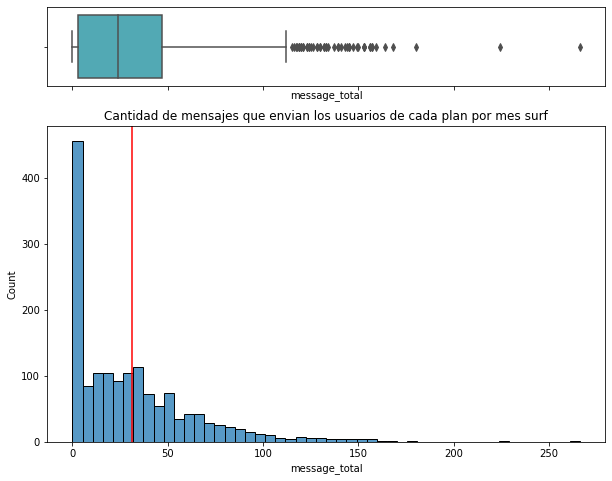

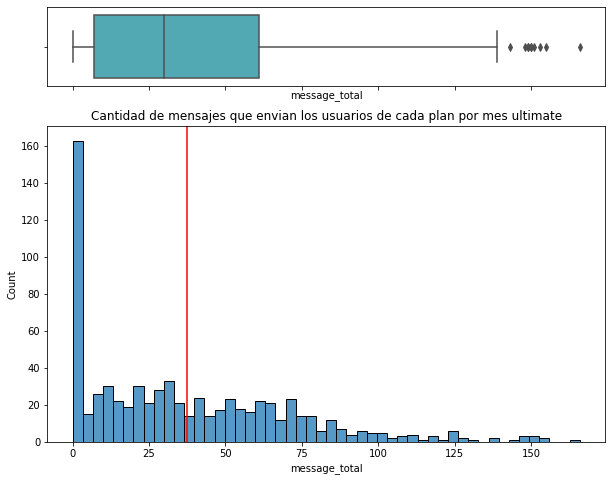

In [67]:
# diagrama de caja para sms
for var in ['surf','ultimate']:
    f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)},figsize=(10,8))
    datos=data_consumo_total.query('plan_name == @var')
    # gráfico boxplot
    sns.boxplot(x=datos['message_total'],data=datos,ax=ax[0],palette='YlGnBu_r')
    # gráfico de distribución
    sns.histplot(datos['message_total'],bins=50,ax=ax[1])
    # media de los datos en el histograma
    ax[1].axvline(datos['message_total'].mean(), color='red')
    plt.title('Cantidad de mensajes que envian los usuarios de cada plan por mes '+var)
    plt.show()

### Internet

In [68]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
group_mb = data_consumo_total.pivot_table(index=['month', 'plan_name'], values='gb_used_total', aggfunc='sum')
group_mb.reset_index(inplace=True)
group_mb.head()

,month,plan_name,gb_used_total
0,1,surf,10.0
1,1,ultimate,29.0
2,2,surf,110.0
3,2,ultimate,121.0
4,3,surf,312.0


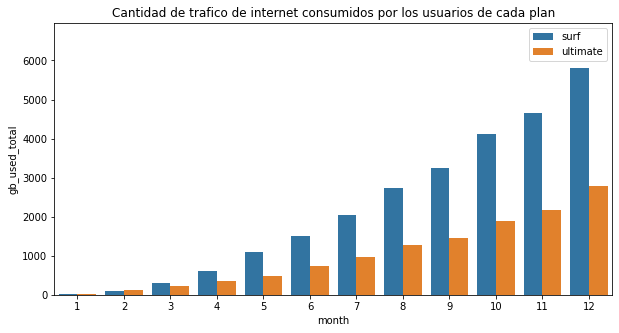

In [69]:
plt.subplots(figsize=(10,5))
sns.barplot(data=group_mb, x='month', y='gb_used_total', hue='plan_name')
plt.ylim(0, group_mb['gb_used_total'].max()*1.2)
plt.title('Cantidad de trafico de internet consumidos por los usuarios de cada plan')
plt.legend(loc='best')
plt.show()

In [70]:
# calculemos la varianza y la media de los mb 
media_sms = data_consumo_total.pivot_table(index='plan_name', values= 'gb_used_total',\
                                       aggfunc=['mean', 'var'])\
                                        .style.format('{:.2f}')
media_sms

,mean,var
,gb_used_total,gb_used_total
plan_name,,
surf,16.67,61.58
ultimate,17.31,58.83


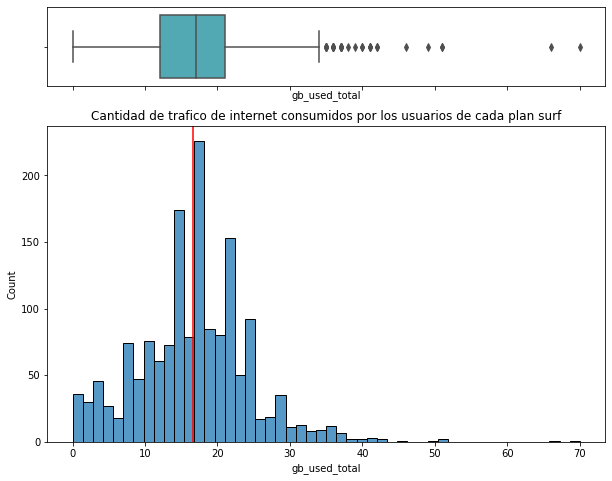

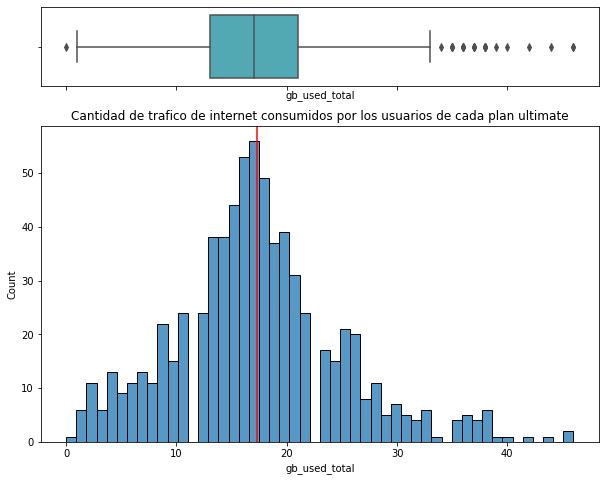

In [71]:
# diagrama de caja para mb
for var in ['surf','ultimate']:
    f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)},figsize=(10,8))
    datos=data_consumo_total.query('plan_name == @var')
    # gráfico boxplot
    sns.boxplot(x=datos['gb_used_total'],data=datos,ax=ax[0],palette='YlGnBu_r')
    # gráfico de distribución
    sns.histplot(datos['gb_used_total'],bins=50,ax=ax[1])
    # media de los datos en el histograma
    ax[1].axvline(datos['gb_used_total'].mean(), color='red')
    plt.title('Cantidad de trafico de internet consumidos por los usuarios de cada plan '+var)
    plt.show()

## Ingreso

- Evaluemos los ingresos de los usuarios por plan.
- vamos a comenzar viendo una descripcion de los cargos extras.

In [72]:
print('Estadísticas para el cargo extra por los usuarios del plan Surf')
data_consumo_total.loc[data_consumo_total['plan_name']=='surf','extra_min':'cargo_total'].describe()\
.style.format('{:.2f}')

Estadísticas para el cargo extra por los usuarios del plan Surf


,extra_min,extra_sms,extra_mb,cargo_total
count,1573.00,1573.00,1573.00,1573.00
mean,1.84,0.21,38.65,60.71
std,3.77,0.58,54.46,55.39
min,0.00,0.00,0.00,20.00
25%,0.00,0.00,0.00,20.00
50%,0.00,0.00,20.00,40.36
75%,2.28,0.00,60.00,80.36
max,30.30,6.48,550.00,590.37


In [73]:
print('Estadísticas para el cargo extra por los usuarios del plan ultimate')
data_consumo_total.loc[data_consumo_total['plan_name']=='ultimate','extra_min':'cargo_total'].describe()\
.style.format('{:.2f}')

Estadísticas para el cargo extra por los usuarios del plan ultimate


,extra_min,extra_sms,extra_mb,cargo_total
count,720.00,720.00,720.00,720.00
mean,0.00,0.00,2.31,72.31
std,0.00,0.00,11.40,11.40
min,0.00,0.00,0.00,70.00
25%,0.00,0.00,0.00,70.00
50%,0.00,0.00,0.00,70.00
75%,0.00,0.00,0.00,70.00
max,0.00,0.00,112.00,182.00


In [74]:
cargos_extras = data_consumo_total.pivot_table(index=['month', 'plan_name'], values='cargo_total', aggfunc='mean')
cargos_extras.columns=['extras_mean']
cargos_extras.reset_index(inplace=True)
cargos_extras.head()

,month,plan_name,extras_mean
0,1,surf,20.000000
1,1,ultimate,70.000000
2,2,surf,34.396667
3,2,ultimate,70.000000
4,3,surf,45.941304


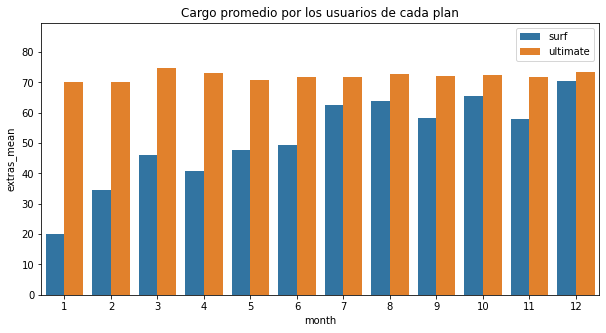

In [75]:
plt.subplots(figsize=(10,5))
sns.barplot(data=cargos_extras, x='month', y='extras_mean', hue='plan_name')
plt.ylim(0, cargos_extras['extras_mean'].max()*1.2)
plt.title('Cargo promedio por los usuarios de cada plan')
plt.legend(loc='best')
plt.show()

In [76]:
total_cargo = data_consumo_total.pivot_table(index='plan_name', values= 'cargo_total', aggfunc=['mean', 'var'])\
                                        .style.format('{:.2f}')
total_cargo

,mean,var
,cargo_total,cargo_total
plan_name,,
surf,60.71,3067.84
ultimate,72.31,129.85


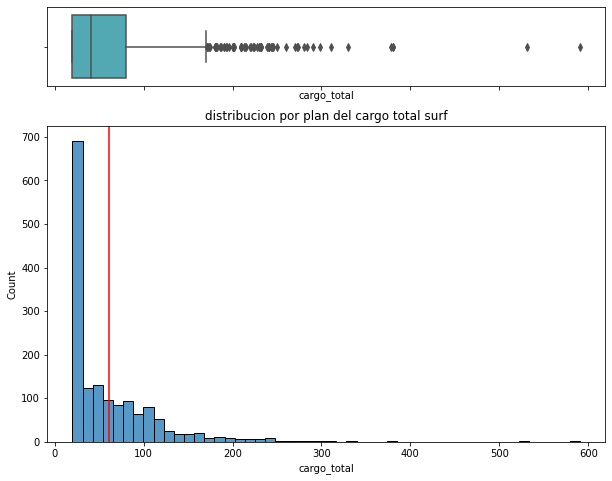

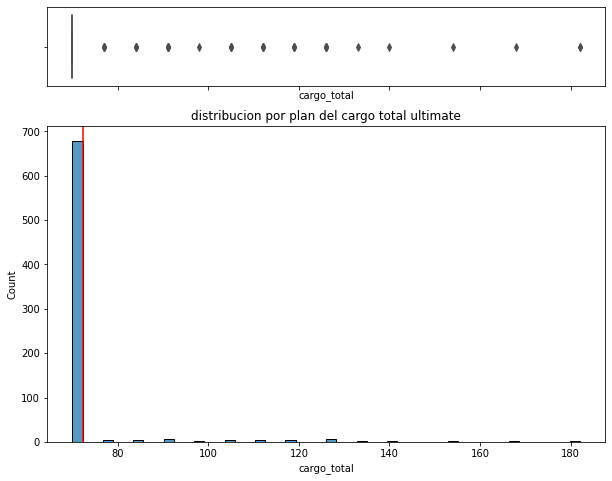

In [77]:
for var in ['surf','ultimate']:
    f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)},figsize=(10,8))
    datos=data_consumo_total.query('plan_name == @var')
    # gráfico boxplot
    sns.boxplot(x=datos['cargo_total'],data=datos,ax=ax[0],palette='YlGnBu_r')
    # gráfico de distribución
    sns.histplot(datos['cargo_total'],bins=50,ax=ax[1])
    # media de los datos en el histograma
    ax[1].axvline(datos['cargo_total'].mean(), color='red')
    plt.title('distribucion por plan del cargo total '+var)
    plt.show()

## Probar las hipótesis estadísticas.

In [78]:
# Vamos a crear las variables para poder realizr las hipotesis.
surf = data_consumo_total.query('plan_name == "surf"')\
            .pivot_table(index='month',values='cargo_total',aggfunc='mean')

ultimate = data_consumo_total.query('plan_name == "ultimate"')\
            .pivot_table(index='month',values='cargo_total',aggfunc='mean')


In [79]:
alpha = 0.05

# Test de Levene para comparar las varianzas de los grupos
stat, p = levene(surf['cargo_total'], ultimate['cargo_total'])

# Imprimimos el resultado del test de Levene
print('Estadístico de prueba: ', stat)
print('p-value: ', p)

# si el valor p es menor que alfa, rechazamos la hipótesis
if p < alpha:
    print("Rechazamos la hipótesis nula, las varianzas son diferentes")
else:
    print("No rechazamos la hipótesis nula, las varianzas son iguales")

Estadístico de prueba:  19.219453090328535
p-value:  0.0002361433364249098
Rechazamos la hipótesis nula, las varianzas son diferentes


In [80]:
# Prueba las hipótesis
# el nivel de significancia estadística
alpha = 0.05

results = st.ttest_ind(surf, ultimate, equal_var=True                                            )

# mostramos las varianzas de cada muestra
print(f'La varianza de surf es: {np.var(surf)[0]}', end='\n')
print(f'La varianza de ultimate es: {np.var(ultimate)[0]}',end='\n\n')
print('p-value: ', results.pvalue)

# si el valor p es menor que alfa, rechazamos la hipótesis
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

La varianza de surf es: 198.0355130973841
La varianza de ultimate es: 1.7056240167926762

p-value:  [0.00049702]
Rechazamos la hipótesis nula


In [81]:
#ya que tenemos que realizar la hipotesis con una ciudad en especifico
#buscare todos los valores unicos de la columna city para obtener el valor que necesitamos
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [82]:
# creamos el set de datos de los cargos totales promedios para cada región
NY_NJ=data_consumo_total.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')\
            .pivot_table(index='month',values='cargo_total',aggfunc='mean')

cities = data_consumo_total.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')\
            .pivot_table(index='month',values='cargo_total',aggfunc='mean')

In [83]:
# test de levene

alpha = 0.05

# Test de Levene para comparar las varianzas de los grupos
stat, p = levene(NY_NJ['cargo_total'], cities['cargo_total'])

# Imprimimos el resultado del test de Levene
print('Estadístico de prueba: ', stat)
print('p-value: ', p)

# si el valor p es menor que alfa, rechazamos la hipótesis
if p < alpha:
    print("Rechazamos la hipótesis nula, las varianzas son diferentes")
else:
    print("No rechazamos la hipótesis nula, las varianzas son iguales")

Estadístico de prueba:  2.7265302756255836
p-value:  0.11357001016638886
No rechazamos la hipótesis nula, las varianzas son iguales


In [84]:
# Prueba las hipótesis
# el nivel de significancia estadística
alpha = 0.05

results = st.ttest_ind(NY_NJ, cities, equal_var=True)

# mostramos las varianzas de cada muestra
print(f'La varianza de NY_NJ es: {np.var(NY_NJ)[0]}',end='\n')
print(f'La varianza de cities es: {np.var(cities)[0]}',end='\n\n')
print('p-value: ', results.pvalue)

# si el valor p es menor que alfa, rechazamos la hipótesis
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

La varianza de NY_NJ es: 96.46941614656724
La varianza de cities es: 47.76366790748491

p-value:  [0.07228256]
No rechazamos la hipótesis nula


## Conclusión general
- Tuvimos que modificar algunas de las columnas de nuestras tablas, para poder tener una mejor investigacion.
- Con esta informacion no teniamos valores duplicados y la unica tabla con valores usentes no fue necesario modificarla ya esos valores ausentes tenian un significado.
- nos entregaron unos datos bastantes limpios por lo que hizo mas practico el estudio para un mejor resultado.
- como teniamos cinco tablas tuvimos que unir esas cinco en una sola con los usuarios y asi poder facilitar las busqueda de la de datos.
- la tabla completa contiene el total de los productos consumidos por mes de cada usuario
- anexamos a nuestro proyecto unas estadisticas descriptivas de cada consumo por plan ya que la idea es comparar que plan tiene mas usuarios y que plan se consume mas.
- calculamos la varianza y la media de nuestros datos por cargo mensual en cada plan y efectivamente llegamos a la conclusion de que los usuarios tienen comportamientos diferentes en los planes.
- El comportamiento de la duración mensual de llamadas de los usuarios entre los planes es muy similar, con una mayor variación en el plan ultimate.
- en cuanto a los sms el comportamiento es muy distinto, el plan ultime es quien predomina en la media
- En lo que se trata del internet la verdad es que los comportamientos son similares.



## Conclusión de hipótesis
- En nuestra primera comparacion de hipótesis calculamos que 
1. la hipótesis nula es que los ingresos promedios de los planes ultimate y surf son iguales 
2. hipotesis alternativa es que los ingresos promedios de los planes ultimate y surf son distintos.

- En nuestra segunda comparacion de hipótesis calculamos lo siguiente:
1. hipótesis nula los ingresos promedios de los usuarios que contrataron el plan en la ciudad de NY-NJ y las demas ciudades son iguales.
2. hipótesis altenativa los ingresos promedios de los usuarios que contrataron el plan en la ciudad de NY-NJ y las demas ciudades son distintas.

- para realizar estas hipotesis utiizanos la prueba estadistica de t de Student con un alpha igual 0.05 asi como tambien por ser distintas sus varianzas vamos a colocar el parametro equal_var en False.